In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
bank=pd.read_csv("bank.csv")
a=bank.head()
a

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [3]:
#Check null values
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [4]:
#Check whether it is integer or not
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int64
 2   marital    11162 non-null  int64
 3   education  11162 non-null  int64
 4   default    11162 non-null  int64
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  int64
 7   loan       11162 non-null  int64
 8   contact    11162 non-null  int64
 9   day        11162 non-null  int64
 10  month      11162 non-null  int64
 11  duration   11162 non-null  int64
 12  campaign   11162 non-null  int64
 13  pdays      11162 non-null  int64
 14  previous   11162 non-null  int64
 15  poutcome   11162 non-null  int64
 16  deposit    11162 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


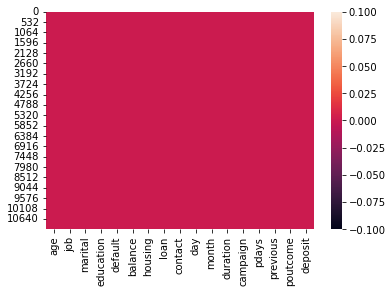

In [5]:
import seaborn as sns
sns.heatmap(bank.isnull())
plt.show()

In [6]:
X=bank.drop("deposit",axis=1)
Y=bank["deposit"]

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

In [8]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [9]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [10]:
def create_model1(model):
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    print("Classification Report")
    print(classification_report(Y_test,Y_pred))
    print("Confusuion Matrix")
    print(confusion_matrix(Y_test,Y_pred))

In [11]:
lr=LogisticRegression()

In [12]:
lr=create_model1(lr)

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1760
           1       0.79      0.77      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349

Confusuion Matrix
[[1441  319]
 [ 359 1230]]


In [13]:
dt=DecisionTreeClassifier()

In [14]:
dt=create_model1(dt)

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1760
           1       0.78      0.77      0.78      1589

    accuracy                           0.79      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349

Confusuion Matrix
[[1408  352]
 [ 360 1229]]


In [ ]:
dt.feature_importances_

In [16]:
dt1=DecisionTreeClassifier(criterion="entropy")

In [17]:
dt1=create_model1(dt1)

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1760
           1       0.78      0.75      0.77      1589

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349

Confusuion Matrix
[[1433  327]
 [ 402 1187]]


In [18]:
dt2=DecisionTreeClassifier(max_depth=8)

In [19]:
dt2=create_model1(dt2)

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1760
           1       0.81      0.80      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

Confusuion Matrix
[[1465  295]
 [ 316 1273]]


In [20]:
dt3=DecisionTreeClassifier(min_samples_leaf=50)

In [21]:
dt3=create_model1(dt3)

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1760
           1       0.78      0.87      0.83      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349

Confusuion Matrix
[[1378  382]
 [ 204 1385]]


In [28]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
dt1=DecisionTreeClassifier(criterion="entropy",min_samples_leaf=50)

In [29]:
model_list=[("logistic",lr),("S+DecisioTree_Gini",dt),("DecisionTree_Entropy",dt1)]

In [30]:
vc=VotingClassifier(estimators=model_list)

In [31]:
vc=create_model1(vc)

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1760
           1       0.81      0.82      0.82      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

Confusuion Matrix
[[1453  307]
 [ 285 1304]]


In [32]:
vc1=VotingClassifier(estimators=model_list,voting="soft")

In [34]:
vc1=create_model1(vc1)

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1760
           1       0.80      0.81      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

Confusuion Matrix
[[1440  320]
 [ 296 1293]]


In [35]:
bc=BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=10)

In [37]:
bc=create_model1(bc)

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.67      0.71      1760
           1       0.67      0.75      0.71      1589

    accuracy                           0.71      3349
   macro avg       0.71      0.71      0.71      3349
weighted avg       0.71      0.71      0.71      3349

Confusuion Matrix
[[1177  583]
 [ 394 1195]]


In [38]:
bc1=BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=500,random_state=1,bootstrap=False) 

In [39]:
bc1=create_model1(bc1)

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.82      0.81      1760
           1       0.79      0.77      0.78      1589

    accuracy                           0.79      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349

Confusuion Matrix
[[1437  323]
 [ 371 1218]]


In [40]:
#Random Forest Tree Classifier
bc2=BaggingClassifier(DecisionTreeClassifier(),n_estimators=10,max_samples=78,random_state=1)

In [41]:
bc2=create_model1(bc2)

Classification Report
              precision    recall  f1-score   support

           0       0.73      0.86      0.79      1760
           1       0.81      0.65      0.72      1589

    accuracy                           0.76      3349
   macro avg       0.77      0.76      0.76      3349
weighted avg       0.77      0.76      0.76      3349

Confusuion Matrix
[[1509  251]
 [ 551 1038]]


In [42]:
rfs=RandomForestClassifier(n_estimators=10,max_features=2,random_state=1)

In [43]:
rfs=create_model1(rfs)

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1760
           1       0.81      0.80      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

Confusuion Matrix
[[1455  305]
 [ 311 1278]]


In [44]:
lr=LogisticRegression()
dt1=DecisionTreeClassifier()
dt2=DecisionTreeClassifier(criterion="entropy")

In [47]:
meta=LogisticRegression()

In [48]:
model_list=[lr,dt1,dt2]

In [49]:
sc=StackingClassifier(classifiers=model_list,meta_classifier=meta)

In [50]:
sc=create_model1(sc)

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1760
           1       0.81      0.81      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

Confusuion Matrix
[[1462  298]
 [ 295 1294]]


In [51]:
ada=AdaBoostClassifier(n_estimators=75)

In [52]:
model=create_model1(ada)

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1760
           1       0.83      0.81      0.82      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349

Confusuion Matrix
[[1493  267]
 [ 309 1280]]


In [53]:
gbc=GradientBoostingClassifier(n_estimators=75)

In [54]:
gbc=create_model1(gbc)

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1760
           1       0.81      0.86      0.83      1589

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.84      0.84      0.84      3349

Confusuion Matrix
[[1437  323]
 [ 228 1361]]


In [55]:
xgc=XGBClassifier(n_estimators=100,reg_alpha=1)

In [56]:
xgc=create_model1(xgc)

[18:46:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1760
           1       0.82      0.87      0.84      1589

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349

Confusuion Matrix
[[1459  301]
 [ 212 1377]]


In [57]:
svc=LinearSVC(random_state=1)

In [59]:
svc=create_model1(svc)

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1760
           1       0.79      0.77      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349

Confusuion Matrix
[[1444  316]
 [ 364 1225]]


In [60]:
svc1=LinearSVC(random_state=1,C=0.08)

In [61]:
svc1=create_model1(svc1)

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1760
           1       0.80      0.77      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349

Confusuion Matrix
[[1446  314]
 [ 363 1226]]


In [62]:
poly_svc=SVC(random_state=1,kernel="poly")

In [63]:
poly_svc=create_model1(poly_svc)

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1760
           1       0.79      0.80      0.80      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.81      0.80      0.80      3349

Confusuion Matrix
[[1417  343]
 [ 311 1278]]


In [64]:
r_svc=SVC(random_state=1,kernel="rbf")

In [66]:
r_svc=create_model1(r_svc)

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1760
           1       0.79      0.84      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

Confusuion Matrix
[[1407  353]
 [ 262 1327]]


In [67]:
gb=GaussianNB()

In [68]:
gb=create_model1(gb)

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.67      0.74      1760
           1       0.69      0.84      0.76      1589

    accuracy                           0.75      3349
   macro avg       0.76      0.75      0.75      3349
weighted avg       0.76      0.75      0.75      3349

Confusuion Matrix
[[1176  584]
 [ 261 1328]]


In [73]:
knc=KNeighborsClassifier(n_neighbors=7,metric="minkowski",p=2)

In [74]:
knc=create_model1(knc)

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.82      0.79      1760
           1       0.78      0.73      0.76      1589

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349

Confusuion Matrix
[[1440  320]
 [ 426 1163]]


In [75]:
svc=LinearSVC(random_state=1)

In [76]:
svc=create_model1(svc)

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1760
           1       0.79      0.77      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349

Confusuion Matrix
[[1444  316]
 [ 364 1225]]


In [77]:
svc1=LinearSVC(random_state=1,C=0.08)

In [78]:
svc1=create_model1(svc1)

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1760
           1       0.80      0.77      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349

Confusuion Matrix
[[1446  314]
 [ 363 1226]]


In [79]:
poly_svc=SVC(random_state=1,kernel="poly")

In [80]:
poly_svc=create_model1(poly_svc)

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1760
           1       0.79      0.80      0.80      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.81      0.80      0.80      3349

Confusuion Matrix
[[1417  343]
 [ 311 1278]]


In [81]:
r_svc=SVC(random_state=1,kernel="rbf")

In [82]:
r_svc=create_model1(r_svc)

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1760
           1       0.79      0.84      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

Confusuion Matrix
[[1407  353]
 [ 262 1327]]


In [83]:
gb=GaussianNB()

In [84]:
gb=create_model1(gb)

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.67      0.74      1760
           1       0.69      0.84      0.76      1589

    accuracy                           0.75      3349
   macro avg       0.76      0.75      0.75      3349
weighted avg       0.76      0.75      0.75      3349

Confusuion Matrix
[[1176  584]
 [ 261 1328]]


In [85]:
knc=KNeighborsClassifier(n_neighbors=7,metric="minkowski",p=2)

In [86]:
knc=create_model1(knc)

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.82      0.79      1760
           1       0.78      0.73      0.76      1589

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349

Confusuion Matrix
[[1440  320]
 [ 426 1163]]
